In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pandas as pd
import torch

In [137]:
df = pd.read_csv('2330.TW.csv')
training_set = df.iloc[:, 1:2].values
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022/10/12,397.0,400.0,395.5,397.5,389.096436,53570085
1,2022/10/13,400.5,403.0,395.0,395.0,386.649292,38046284
2,2022/10/14,414.5,416.0,409.0,412.0,403.289917,54504366
3,2022/10/17,400.0,403.5,396.0,397.0,388.607025,41512192
4,2022/10/18,406.5,407.0,399.5,407.0,398.395599,40093216


In [138]:
#數據標準化
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [139]:
#將時間步合併到資料中
X_train = []
y_train = []
for i in range(5, 191):
    X_train.append(training_set_scaled[i-5:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [140]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [141]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
6/6 [==============================] - 4s 7ms/step - loss: 0.4029
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2567
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0709
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0612
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0358
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0402
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0300
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0276
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0228
Epoch 10/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0214
Epoch 11/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0202
Epoch 12/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0187
Epoch 13/1000
6/6 [==============================

In [142]:
dataset_test = pd.read_csv('2330test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023/7/31,575,575,560,565,561.866943,24208467
1,2023/8/1,565,568,564,567,563.855835,16259643
2,2023/8/2,567,569,558,561,557.889099,25583234
3,2023/8/4,556,560,552,554,550.927917,26279173
4,2023/8/7,558,561,556,558,554.905762,14369551


In [143]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-5:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(6, 56):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 4ms/step


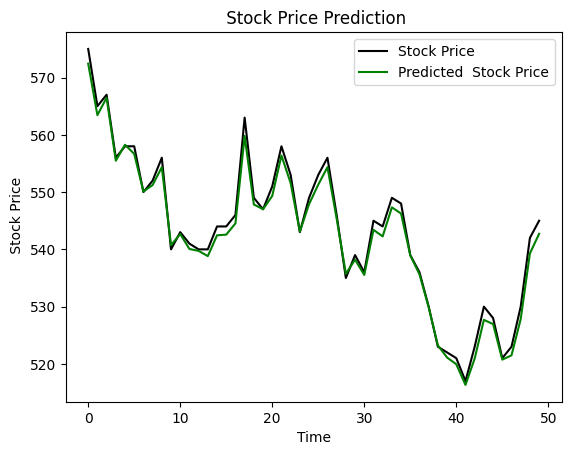

In [144]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

##### from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [145]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(r2_score(real_stock_price, predicted_stock_price))

0.9886281593792859
